In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc # 한글 그래픽 처리
import seaborn as sns
import warnings

plt.style.use('seaborn')
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 50)

In [212]:
#과제 1번
from sklearn import datasets
diabetes = datasets.load_diabetes()
df_x = pd.DataFrame(diabetes.data)
df_x.columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6']
df_y = pd.DataFrame(diabetes.target, columns=['target'])
df = pd.concat([df_x,df_y],axis=1)
#"""순서형 인코딩 과제"""
ages=pd.DataFrame(pd.Series(df['age'].sort_values().unique()),pd.Series(range(57))).reset_index()
ages.columns=['encoded','age']
values=pd.merge(df,ages,how='left')['encoded']
df2=df.copy()
df2['age']=values
display(df2.head())
display(df.head())

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,40.0,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,29.0,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,53.0,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,5.0,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,31.0,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [213]:
#과제 2번
from numpy.linalg import inv 

#데이터 생성
X = np.array([ [1, 0, 1],
               [1, 2, 3],
               [1, 3, 8]]) #3x3
y = np.transpose(np.array([1, 3, 7])) #3x1

#함수생성
def estimate_beta(X, y):
    beta_hat = inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
    return beta_hat

#사이킷런
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=False).fit(X, y)

#비교
print(estimate_beta(X,y))
print(reg.coef_)

[0.25 0.25 0.75]
[0.25 0.25 0.75]


In [2]:
data=pd.read_csv('Auction_master_train.csv')

In [4]:
data.loc[data['Specific'].isnull(),'Specific']='없음'
data.loc[data['addr_li'].isnull(),'addr_li']='불명'
data.loc[data['road_bunji2'].isnull(),'road_bunji2']='불명' 
data.loc[data['addr_bunji2'].isnull(),'addr_bunji2']='불명' 
data.loc[data['addr_bunji1'].isnull(),'addr_bunji1']='불명' 
# 범주형 변수의 대치는 거의 불가능, 낙찰가에대한 유의한 정보도 담고있지 않는듯 하다
# 따라서 이 데이터의 범주형 결측치는 그 자체를 정보로 사용할 것

In [5]:
# 구글링을 통해 얻은 도로명과 번지
road=['충렬대로 271',
'좌동순환로433번길 30',
'아차산로 451',
'매봉로4길 15',
'한천로 988',
'우이천로 367',
'서울시 금천구 한내로 62',
'천왕로 96',
'등촌로13다길 29', 
'서울시 구로구 공원로 27'] 

#변수 전처리와 생성
len(road)==data.loc[data['road_bunji1'].isnull(),['addr_do','addr_si','addr_dong']].apply(lambda x:' '.join(x),1).nunique()
road_name=pd.Series(road).apply(lambda x: x[:-3])
road_bunji=pd.Series(road).apply(lambda x: x[-3:]).astype('int')
rownum=data.loc[data['road_bunji1'].isnull(),].index
data.loc[rownum,'road_name']=road_name
data.loc[rownum,'road_bunji1']=road_bunji
region=data['addr_do']

In [6]:
#데이터셋 생성
data2=data.copy()

In [7]:
#연속형 전처리
data2['available_land_area']=data['Total_land_real_area']/data['Total_land_gross_area']
data2['available_building_area']=data['Total_building_area']/data['Total_land_gross_area']
data2['diff_rate_price']=data['Total_appraisal_price']/data['Minimum_sales_price']
data2['diff_auction_day']=pd.to_datetime(data['Final_auction_date'])-pd.to_datetime(data['First_auction_date'])
data2['diff_auction_day']=data2['diff_auction_day'].apply(lambda x: x.days)

In [8]:
#연속형 -> 범주형
data2['addr_bunji1']=data['addr_bunji1'].astype(str).apply(lambda x:x[:-2])
data2['road_bunji1']=data['road_bunji1'].astype(str).apply(lambda x:x[:-2])

In [9]:
data2['year']=data['Appraisal_date'].apply(lambda x:x[:4]) # 몇개안되니까 원핫인코딩 진행할예정
data2['month']=data['Appraisal_date'].apply(lambda x:x[5:7])

In [10]:
data2['Preserve_year']=data['Preserve_regist_date'].apply(lambda x:x[:4]) #1111이란 이상치가 있어서 범주형으로 

In [11]:
data2['region']=data2.loc[:,['addr_do','addr_si']].apply(lambda x: ' '.join(x),1)

In [12]:
data2['Close_date']=data['Close_date'].apply(lambda x: x[:7]) ## 1111년도 존재 범주형처리 

In [13]:
#사용한 변수 제거 (다중공선성 문제 + 충분히 대체 가능한 다른 변수 존재)
data2.drop(['Auction_key','Appraisal_date','First_auction_date','Final_auction_date','addr_dong','addr_li','addr_si','addr_do','addr_san','addr_etc','Preserve_regist_date','road_name','point.y','point.x','addr_bunji1','road_bunji1'],axis=1,inplace=True)

In [14]:
# Total_land_gross_area는 살리고, 나머지 상관큰 변수중 Total_building_auction_area 사용
pd.concat([data2.iloc[:,6:11],data2.iloc[:,28]],axis=1).corr() 

,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,diff_auction_day
Total_land_gross_area,1.000000,0.049791,0.048225,0.017401,0.016474,-0.028461
Total_land_real_area,0.049791,1.000000,0.996224,0.940361,0.934759,0.022773
Total_land_auction_area,0.048225,0.996224,1.000000,0.938144,0.941681,0.024420
Total_building_area,0.017401,0.940361,0.938144,1.000000,0.993533,0.061207
Total_building_auction_area,0.016474,0.934759,0.941681,0.993533,1.000000,0.061622
diff_auction_day,-0.028461,0.022773,0.024420,0.061207,0.061622,1.000000


In [15]:
data2.drop(['Total_land_real_area','Total_land_auction_area','Total_building_area'],axis=1,inplace=True)

In [16]:
# 존재, 불명 두 정보만 사용
data2.loc[data2['addr_bunji2']!='불명','addr_bunji2']='존재'
data2.loc[data2['Specific']!='불명','Specific']='존재'

In [17]:
dum_list= data2.apply(lambda x: x.nunique())<500 # 범주형 변수 자의적 구분 어려움 -> Unique한 값이 500개 이하인 것들 일단 추출
dum_list=dum_list[dum_list==True]

In [18]:
# 범주형으로 쓰지 않을 변수들
dum_list.drop(['Auction_count','Auction_miscarriage_count','Total_floor','Current_floor','diff_rate_price'],inplace=True) 

In [19]:
from sklearn.decomposition import PCA
def dummy_to_pca(data, column_name:str) :
    f = pd.get_dummies(data[str(column_name)]) 
    pca = PCA()
    pca.fit(f)
    cumsum = np.cumsum(pca.explained_variance_ratio_) #분산의 설명량을 누적합
    #print(cumsum)
    num_d = np.argmax(cumsum >= 0.99) + 1 # 분산의 설명량이 99%이상 되는 차원의 수
    if num_d < 3:
         return f
    else:
        pca = PCA(n_components=num_d)    
        result = pca.fit_transform(f)
        result = pd.DataFrame(result)
        result.columns = [column_name + '_' + str(column) for column in result.columns]
        result.index = f.index
        return result.reset_index()

In [20]:
dum_original=[] # 기본
for feature in dum_list.index:
    dum_original.append(pd.get_dummies(data2[str(feature)]))

In [21]:
dum_pca=[] # dummy to pca 사용
for feature in dum_list.index:
    dum_pca.append(dummy_to_pca(data2,feature))

In [22]:
data3_pca=data2.drop(dum_list.index,axis=1)
data3=data2.drop(dum_list.index,axis=1)

In [25]:
for feature in dum_original:
    data3=pd.concat([data3,feature],axis=1)

In [26]:
for feature in dum_pca:
    data3_pca=pd.concat([data3_pca,feature],axis=1)

In [27]:
data3_pca.loc[data3['available_building_area']>20000000,['available_land_area','available_building_area']]=None

In [211]:
#%%time
#from fancyimpute import IterativeImputer
#XY_incomplete = data3_pca
#n_imputations = 3
#XY_completed = [] 
#for i in range(n_imputations):
#    imputer = IterativeImputer(n_iter=3, sample_posterior=True, random_state=2)
#    XY_completed.append(imputer.fit_transform(XY_incomplete))
#
#imputed = pd.DataFrame(np.mean(XY_completed, 0))
#XY_completed_std = np.std(XY_completed, 0)

In [41]:
imputed.columns=list(data3_pca)

In [42]:
data3[['available_building_area','available_land_area']]=imputed[['available_building_area','available_land_area']] # 기본 데이터 셋
df=data3.copy()

In [43]:
data3_pca[['available_building_area','available_land_area']]=imputed[['available_building_area','available_land_area']] # dummy pca 데이터 셋 
df_pca=data3_pca.copy()

In [108]:
a=data3.iloc[:,[0,1,2,3,4,5,6,7,8,10,11,12]] 

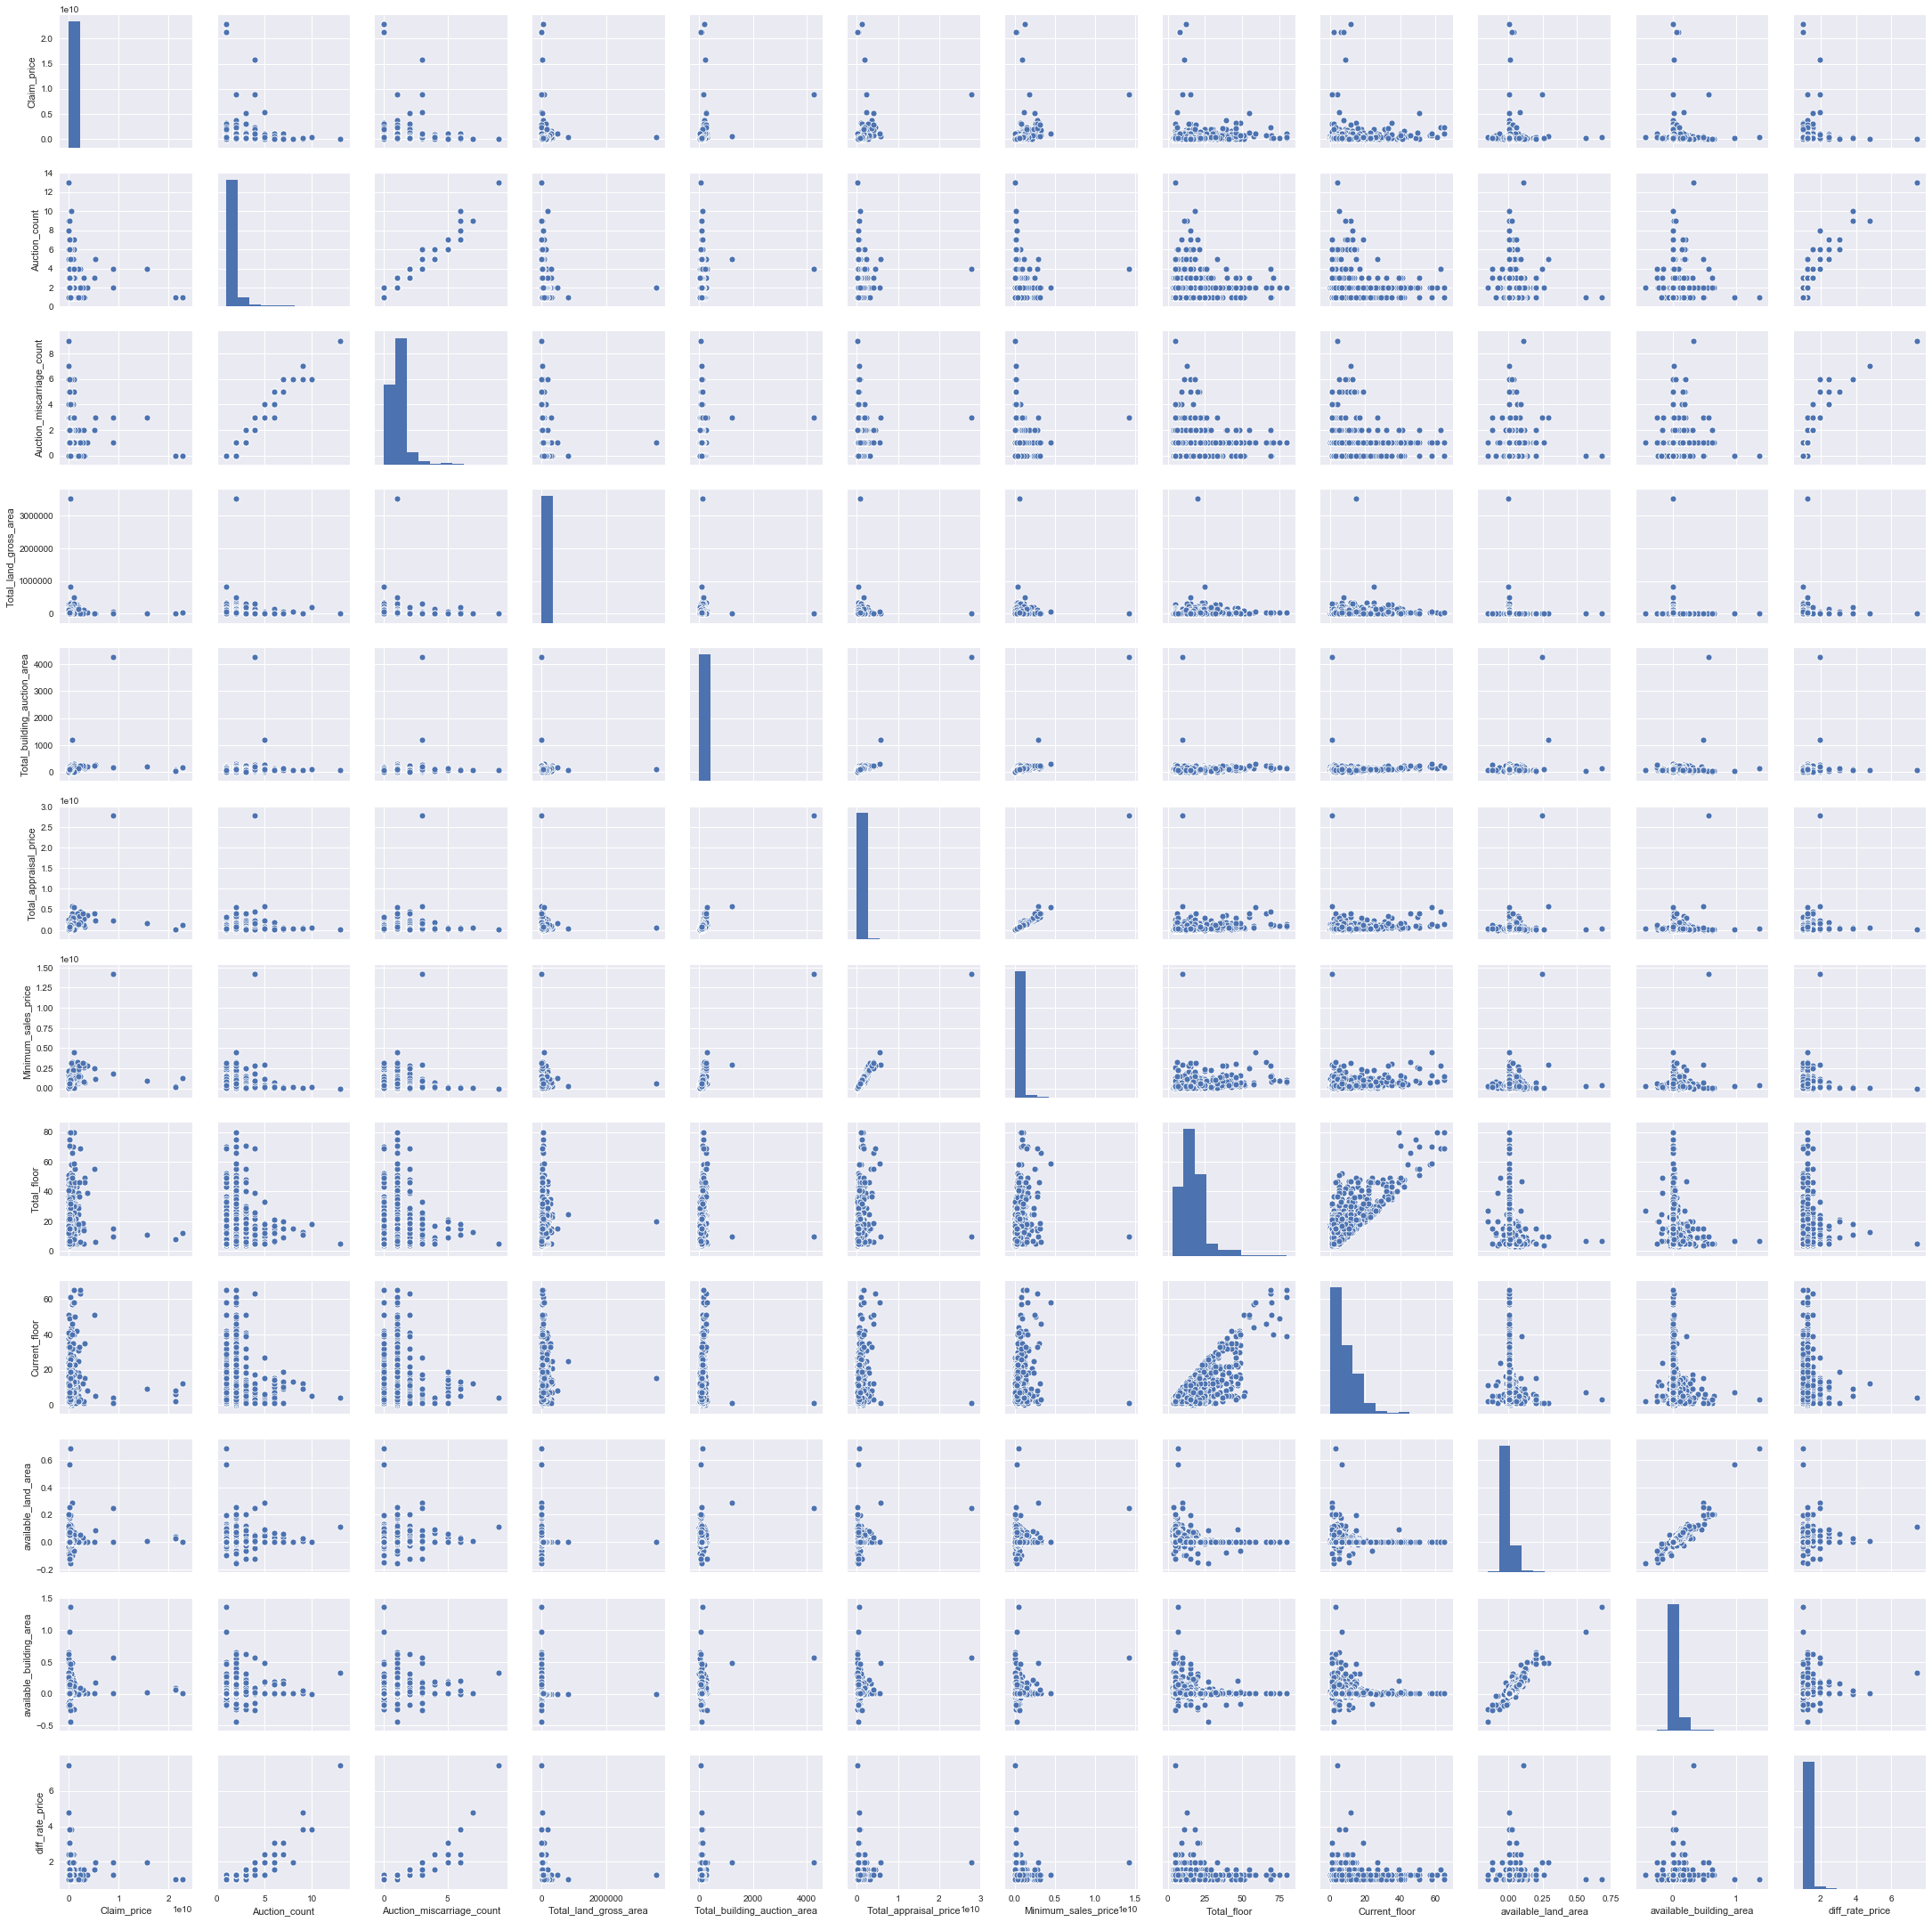

In [109]:
sns.pairplot(a) #분포가 전체적으로 왼쪽으로 쏠림

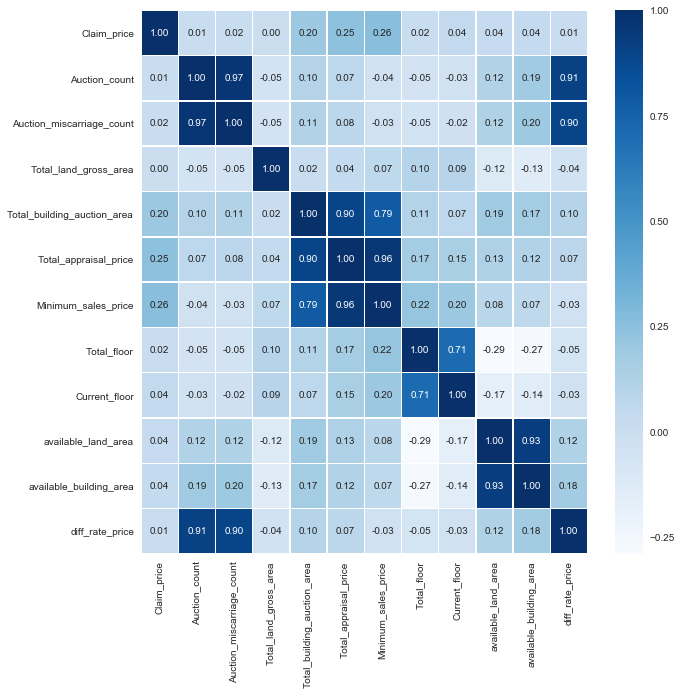

In [111]:
#상관계수 행렬
plt.figure(figsize=(10,10))
sns.heatmap(data = a.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Hammer_price'],axis=1), df['Hammer_price'], test_size=0.25, random_state=4)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(df_pca.drop(['Hammer_price'],axis=1), df_pca['Hammer_price'], test_size=0.25, random_state=4)

In [48]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model_p = LinearRegression()
model_p.fit(X_train_p, y_train_p)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
#PCA와 기본 비교
import sklearn as sk
print('기본 모델 R-square :' ,round(model.score(X_train, y_train),7))
print('PCA  모델 R-square :' ,round(model_p.score(X_train_p, y_train_p),7)) 
print('==============================')
print('기본 모델 Test R-square :' ,round(model.score(X_test, y_test),7))
print('PCA  모델 Test R-square :' ,round(model_p.score(X_test_p, y_test_p),7)) 
print('==============================')
print(sk.metrics.mean_squared_error(y_train, model.predict(X_train)))
print(sk.metrics.mean_squared_error(y_train_p, model_p.predict(X_train_p)))

# 기본 모델 채택

기본 모델 R-square : 0.9956968
PCA  모델 R-square : 0.9956376
기본 모델 Test R-square : 0.9752344
PCA  모델 Test R-square : 0.9536597
857724676209127.6
869523952121176.5


In [107]:
a=data3.iloc[:,[0,1,2,3,4,5,6,7,8,10,11,12]]  # 연속형 변수모음

In [104]:
#VIF확인하기
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    a.values, i) for i in range(a.shape[1])]
vif["features"] = a.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
1,96.527977,Auction_count
5,72.740191,Total_appraisal_price
11,46.861450,diff_rate_price
6,46.217398,Minimum_sales_price
2,24.786163,Auction_miscarriage_count
4,16.973663,Total_building_auction_area
10,9.685572,available_building_area
9,9.404205,available_land_area
7,9.177471,Total_floor
8,4.539466,Current_floor


In [113]:
#범주형은 확인X 다중공선성 제거 
b=a.drop(['Total_appraisal_price','Auction_miscarriage_count','Auction_count'],axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
7,9.302429,available_building_area
6,9.012144,available_land_area
4,8.282870,Total_floor
2,5.072666,Total_building_auction_area
3,4.967743,Minimum_sales_price
8,4.717565,diff_rate_price
5,4.505832,Current_floor
1,1.162225,Total_land_gross_area
0,1.159504,Claim_price


In [114]:
df_vif=df.drop(['Total_appraisal_price','Auction_miscarriage_count','Auction_count'],axis=1)
df_pca_vif=df_pca.drop(['Total_appraisal_price','Auction_miscarriage_count','Auction_count'],axis=1)

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_vif.drop(['Hammer_price'],axis=1), df_vif['Hammer_price'], test_size=0.25, random_state=1)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(df_pca_vif.drop(['Hammer_price'],axis=1), df_pca_vif['Hammer_price'], test_size=0.25, random_state=1)

In [119]:
model = LinearRegression()
model.fit(X_train, y_train)
model_p = LinearRegression()
model_p.fit(X_train_p, y_train_p)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [121]:
#공선성 제거 후 
import sklearn as sk
print('기본 모델 R-square :' ,round(model.score(X_train, y_train),7))
print('PCA  모델 R-square :' ,round(model_p.score(X_train_p, y_train_p),7)) 
print('==============================')
print('기본 모델 Test R-square :' ,round(model.score(X_test, y_test),7))
print('PCA  모델 Test R-square :' ,round(model_p.score(X_test_p, y_test_p),7)) 
print('==============================')
print('기본 모델 MSE :',sk.metrics.mean_squared_error(y_train, model.predict(X_train)))
print('PCA  모델 MSE :',sk.metrics.mean_squared_error(y_train_p, model_p.predict(X_train_p)))

#MSE가 소폭 상승했으나, 통계적 가정을 만족시키므로 이쪽이 더욱 바람직 해 보인다.

기본 모델 R-square : 0.9973063
PCA  모델 R-square : 0.9971885
기본 모델 Test R-square : 0.9765106
PCA  모델 Test R-square : 0.9260787
기본 모델 MSE : 901444239333783.4
PCA  모델 MSE : 940891939185545.1


In [177]:
df_log=df_vif.copy()

In [178]:
df_log.iloc[:,[0,1,2,3,4,5,9]].describe() # 음수가 없는 열들

,Claim_price,Total_land_gross_area,Total_building_auction_area,Minimum_sales_price,Total_floor,Current_floor,diff_rate_price
count,1.933000e+03,1.933000e+03,1933.000000,1.933000e+03,1933.000000,1933.000000,1933.000000
mean,3.703908e+08,3.458714e+04,94.148810,4.155955e+08,16.980859,8.817900,1.205643
std,1.337869e+09,9.442101e+04,106.845985,5.030312e+08,9.509021,8.044644,0.280383
min,0.000000e+00,0.000000e+00,1.500000,4.285000e+06,3.000000,0.000000,1.000000
25%,7.746112e+07,2.997000e+03,59.970000,1.750000e+08,12.000000,3.000000,1.000000
50%,1.728143e+08,1.424140e+04,84.860000,3.120000e+08,15.000000,7.000000,1.250000
75%,3.565089e+08,4.140310e+04,114.850000,4.864000e+08,21.000000,12.000000,1.250000
max,2.286481e+10,3.511936e+06,4255.070000,1.422080e+10,80.000000,65.000000,7.450555


In [179]:
df_log.iloc[:,[0,1,2,3,4,5,7,8,9]]=np.log(df_log.iloc[:,[0,1,2,3,4,5,7,8,9]]+1)

In [185]:
#정규화 시도
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_vif)
df_scaled = pd.DataFrame(scaler.transform(df_vif))
df_scaled.columns=list(df_vif)

In [186]:
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(df_log.drop(['Hammer_price'],axis=1), df_log['Hammer_price'], test_size=0.2, random_state=1)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(df_scaled.drop(['Hammer_price'],axis=1), df_scaled['Hammer_price'], test_size=0.2, random_state=1)

In [187]:
model_l = LinearRegression()
model_l.fit(X_train_l, y_train_l)
model_s = LinearRegression()
model_s.fit(X_train_s, y_train_s)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [190]:
#fit된 모델의 R-square
print('기본 모델 R-square :' ,round(model.score(X_train, y_train),7))
print('로그 모델 R-square :' ,round(model_l.score(X_train_l, y_train_l),7)) 
print('표준 모델 R-square :' ,round(model_s.score(X_train_s, y_train_s),7)) 
print('==============================')
#공선성 제거한 일반 모델이 가장 괜찮은 성능

기본 모델 R-square : 0.9973063
로그 모델 R-square : 0.9602418
표준 모델 R-square : 0.9949828


In [207]:
from sklearn.linear_model import Ridge, Lasso
for i in [0.3,0.6,0.9]:
    ridge=Ridge(alpha=i)
    ridge.fit(X_train, y_train)
    print('알파'+str(i)+'일때 모델 R-square :',round(ridge.score(X_train, y_train),7))
    print('알파'+str(i)+'일때 Test R-square :',round(ridge.score(X_test, y_test),7))
    print('알파'+str(i)+'일때 모델 MSE :',round(sk.metrics.mean_squared_error(y_train, ridge.predict(X_train)),7))
    print('=========================================')
# 규제가 커질수록 Test R-square는 상승하나, MSE는 하락 (일반화의 일부?)

알파0.3일때 모델 R-square : 0.9969424
알파0.3일때 Test R-square : 0.9817735
알파0.3일때 모델 MSE : 1023230056007446.6
알파0.6일때 모델 R-square : 0.9966691
알파0.6일때 Test R-square : 0.9829026
알파0.6일때 모델 MSE : 1114698634712699.6
알파0.9일때 모델 R-square : 0.9964497
알파0.9일때 Test R-square : 0.9835539
알파0.9일때 모델 MSE : 1188108036777507.0


In [210]:
for i in [0.3,0.6,0.9]:
    lasso=Lasso(alpha=i)
    lasso.fit(X_train, y_train)
    print('알파'+str(i)+'일때 모델 R-square :',round(lasso.score(X_train, y_train),7))
    print('알파'+str(i)+'일때 Test R-square :',round(lasso.score(X_test, y_test),7))
    print('알파'+str(i)+'일때 모델 MSE :',round(sk.metrics.mean_squared_error(y_train, lasso.predict(X_train)),7))
    print('=========================================')
#Ridge와 비슷한 양상

알파0.3일때 모델 R-square : 0.9973063
알파0.3일때 Test R-square : 0.9763238
알파0.3일때 모델 MSE : 901444233854413.1
알파0.6일때 모델 R-square : 0.9973063
알파0.6일때 Test R-square : 0.9763328
알파0.6일때 모델 MSE : 901444234439473.6
알파0.9일때 모델 R-square : 0.9973063
알파0.9일때 Test R-square : 0.9763421
알파0.9일때 모델 MSE : 901444235408204.4


주어진 데이터 하에서는, 차원축소 적용 X, 다중공선성 제거, 표준화 등의 단위변환을 하지않은 모델이 가장 좋은 R-square가 나왔다.